# Bank Churn Prediction 

Objective: 
Given a Bank customer, build a neural network based classifier that can determine whether they will leave or not in the next 6 months.  
 
Context:  
Businesses like banks which provide service have to worry about problem of 'Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on improvement of service, keeping in mind these priorities.  
 
Data Description:  
The case study is from an open-source dataset from Kaggle.  The dataset contains 10,000 sample points with 14 distinct features such as CustomerId, CreditScore, Geography, Gender, Age, Tenure, Balance etc. 

In [64]:
#Load basic libraries

import numpy as np
import pandas as pd
import seaborn as sns
import math
import numbers
import random
import operator
import random

#import standard visualization

import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
sns.set(style = 'darkgrid')
from IPython.display import HTML, display
from IPython.core import display as ICD
from pandas.plotting import scatter_matrix
pd.options.display.max_columns = None
import warnings
import scikitplot as skplt
from sklearn.metrics import confusion_matrix
import itertools

#Load machine learning libraries

from sklearn import ensemble, metrics
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import Normalizer
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import sklearn.metrics as skm
from sklearn.metrics import classification_report 
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc
import matplotlib.pyplot as plt

#Load neural network libraries

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras import optimizers

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Loading and initial analysis

In [2]:
bcm_df = pd.read_csv("bank.csv")
bcm_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
bcm_df.shape

(10000, 14)

In [4]:
bcm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
bcm_df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [6]:
#Check for missing values, incorrect data, duplicate data 

print ("\nMissing values :  ", bcm_df.isnull().sum().values.sum())

print ("\nUnique values :  \n", bcm_df.nunique())

print ("\nDuplicate values :  \n", bcm_df.duplicated().sum())


Missing values :   0

Unique values :  
 RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

Duplicate values :  
 0


In [7]:
#Dropping columns with unique values for all customers

bcm_df.drop('RowNumber', axis=1, inplace = True)
bcm_df.drop('CustomerId', axis=1, inplace = True)

bcm_df

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [8]:
bcm_df.shape

(10000, 12)

In [9]:
bcm_df.cov() 

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,9341.860157,-4.019150,0.235355,3.780408e+04,0.687999,-0.240492,1.239139,-7.694701e+03,-1.054722
Age,-4.019150,109.994084,-0.303229,1.852533e+04,-0.187157,-0.056036,0.448026,-4.343373e+03,1.205250
Tenure,0.235355,-0.303229,8.364673,-2.211395e+03,0.022616,0.029773,-0.040997,1.294687e+03,-0.016309
Balance,37804.076998,18525.333354,-2211.394696,3.893436e+09,-11039.815064,-422.619801,-314.483074,4.592389e+07,2978.931708
NumOfProducts,0.687999,-0.187157,0.022616,-1.103982e+04,0.338322,0.000844,0.002794,4.751478e+02,-0.011203
HasCrCard,-0.240492,-0.056036,0.029773,-4.226198e+02,0.000844,0.207791,-0.002703,-2.604105e+02,-0.001310
IsActiveMember,1.239139,0.448026,-0.040997,-3.144831e+02,0.002794,-0.002703,0.249797,-3.282927e+02,-0.031429
EstimatedSalary,-7694.701048,-4343.372926,1294.686597,4.592389e+07,475.147781,-260.410522,-328.292660,3.307457e+09,280.204670
Exited,-1.054722,1.205250,-0.016309,2.978932e+03,-0.011203,-0.001310,-0.031429,2.802047e+02,0.162223


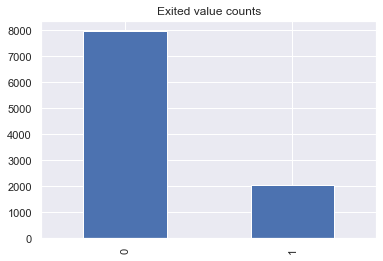

In [10]:
#Exploratory data analysis

value_counts = bcm_df['Exited'].value_counts()
value_counts.plot.bar(title = 'Exited value counts')

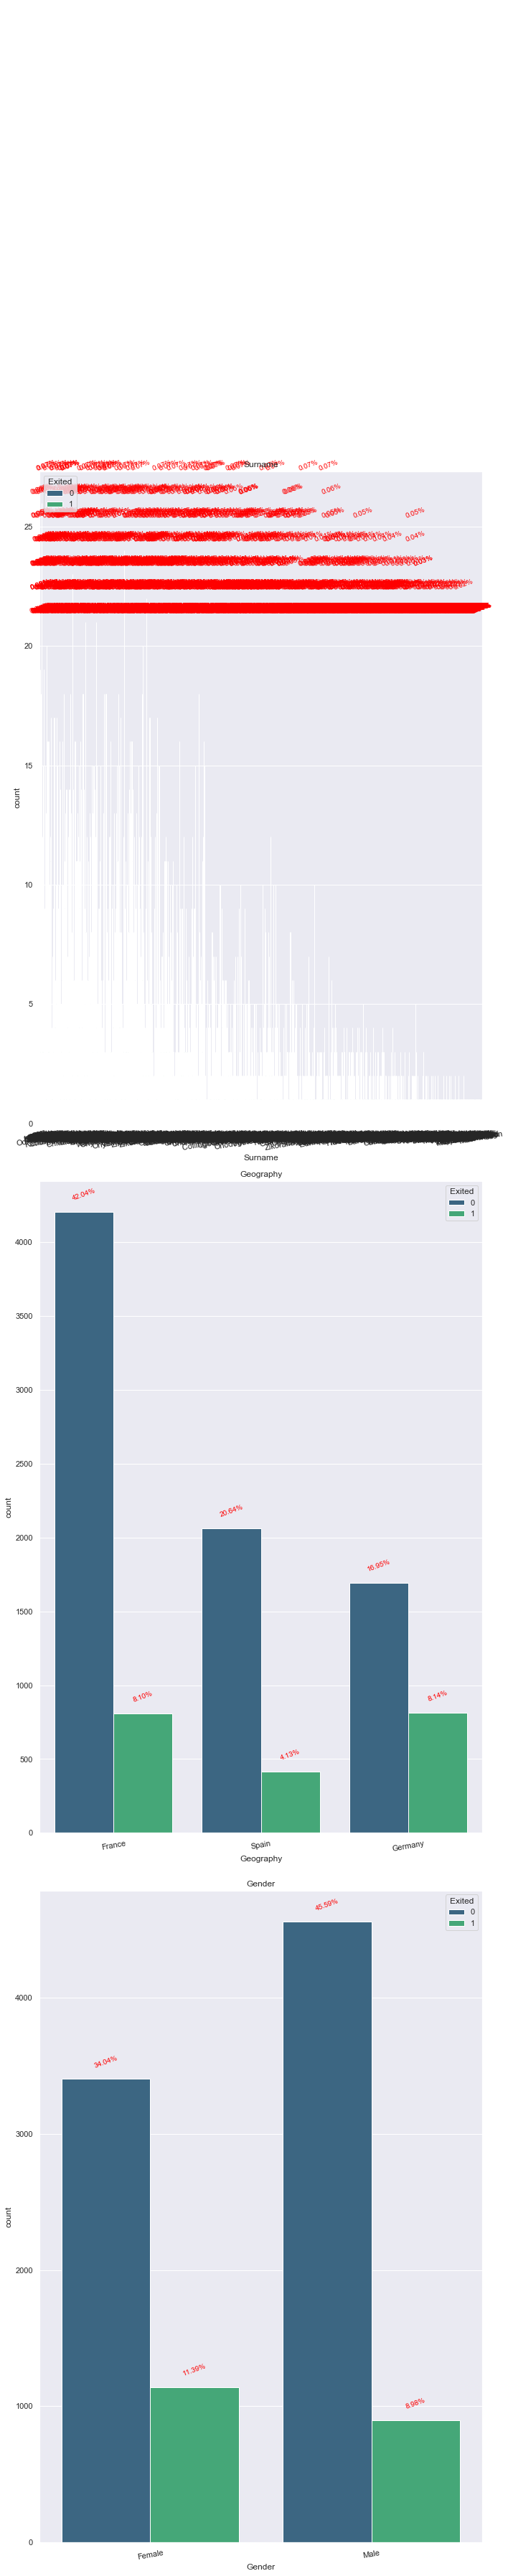

In [11]:
objs = bcm_df.select_dtypes('object')
objs = objs.dropna()
fig, ax = plt.subplots(3, 1, figsize=(10,50))
for i, obj in enumerate(objs):
    sns.countplot(obj, data=bcm_df, hue='Exited', orient='vertical', ax=ax[i], palette='viridis')
    for p in ax[i].patches:
        y=p.get_bbox().get_points()[1,1]
        ax[i].annotate('{:1.2f}%'.format(100.*y/bcm_df[obj].count()), (p.get_x()+0.2, p.get_height()+20), 
            ha='center', va='bottom',fontsize=10, color='red', rotation=20, xytext=(0, 10),
         textcoords='offset points') # set the alignment of the text

    ax[i].tick_params(axis='x', rotation=10)
    ax[i].set_title(obj)
    plt.tight_layout()

In [11]:
#Creating matrice

X_df = bcm_df.iloc[:, :-1]
y_df = bcm_df.iloc[:, -1]

In [12]:
X_df.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88
1,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63
4,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [13]:
y_df.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [14]:
#Encoding categorical data

le = preprocessing.LabelEncoder()
X_df = X_df.apply(le.fit_transform)
X_df.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,1115,228,0,0,24,2,0,0,1,1,5068
1,1177,217,2,0,23,1,743,0,0,1,5639
2,2040,111,0,0,24,8,5793,2,1,0,5707
3,289,308,0,0,21,1,0,1,0,0,4704
4,1822,459,2,0,25,2,3696,0,1,1,3925


In [15]:
X_df.shape

(10000, 11)

In [16]:
#Applying onehotencoder

enc = preprocessing.OneHotEncoder()
enc.fit(X_df)
onehotlabels = enc.transform(X_df).toarray()
onehotlabels.shape

(10000, 19867)

In [17]:
onehotlabels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [18]:
type(onehotlabels)

numpy.ndarray

In [19]:
#Splitting the data into train and test set

X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size = 0.2, random_state = 0)

In [20]:
#Normalizing features

X_train = preprocessing.normalize(X_train)

In [21]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8000, 11)
(2000, 11)
(8000,)
(2000,)


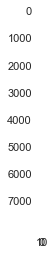

In [22]:
plt.imshow(X_train,cmap='gray')

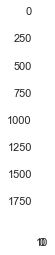

In [23]:
plt.imshow(X_test,cmap='gray')

# Building Artifical Neural Network

# Creating the model "Classifier1"

In [24]:
# Initialize the constructor
classifier1 = Sequential()

In [25]:
# Define model architecture with layers and activation function

# Adding the input layer and the first hidden layer
classifier1.add(Dense(64, input_shape = (11,), activation = 'relu'))

# Adding the second hidden layer
classifier1.add(Dense(32, activation = 'tanh'))

# Adding the output layer
classifier1.add(Dense(1, activation = 'sigmoid'))

In [26]:
# Compiling the model with optimizers and loss function

sgd = optimizers.Adam(lr = 0.001)
classifier1.compile(optimizer = sgd, loss = 'binary_crossentropy', metrics = ['accuracy'])

# Model Summary: Classifier1

In [27]:
classifier1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                768       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 2,881
Trainable params: 2,881
Non-trainable params: 0
_________________________________________________________________


# Training the Model: Classifier1

In [28]:
#Fitting the model (forward pass and back propagation)

classifier1.fit(X_train, y_train, batch_size = 700, epochs = 10, verbose = 1)

Train on 8000 samples
Epoch 1/10
8000/8000 [==============================] - 1s 87us/sample - loss: 0.6186 - accuracy: 0.7684
Epoch 2/10
8000/8000 [==============================] - 0s 6us/sample - loss: 0.5380 - accuracy: 0.7960
Epoch 3/10
8000/8000 [==============================] - 0s 7us/sample - loss: 0.5144 - accuracy: 0.7960
Epoch 4/10
8000/8000 [==============================] - 0s 6us/sample - loss: 0.5094 - accuracy: 0.7960
Epoch 5/10
8000/8000 [==============================] - 0s 6us/sample - loss: 0.5047 - accuracy: 0.7960
Epoch 6/10
8000/8000 [==============================] - 0s 6us/sample - loss: 0.5026 - accuracy: 0.7960
Epoch 7/10
8000/8000 [==============================] - 0s 6us/sample - loss: 0.5015 - accuracy: 0.7960
Epoch 8/10
8000/8000 [==============================] - 0s 7us/sample - loss: 0.5007 - accuracy: 0.7960
Epoch 9/10
8000/8000 [==============================] - 0s 7us/sample - loss: 0.5003 - accuracy: 0.7960
Epoch 10/10
8000/8000 [==================

# Model Evaluation: Classifier1

In [29]:
X_test = preprocessing.normalize(X_test)

In [30]:
results = classifier1.evaluate(X_test, y_test)

2000/2000 [==============================] - 0s 107us/sample - loss: 0.4967 - accuracy: 0.7975


In [31]:
print(classifier1.metrics_names)
print(results)    

['loss', 'accuracy']
[0.4967025058269501, 0.7975]


In [32]:
#Accuracy score for Classifier1

loss, acc = classifier1.evaluate(X_test, y_test, verbose=0)
print('Accuracy: %.3f'  % acc)
print('Loss: %.3f' % loss)

Accuracy: 0.798
Loss: 0.497


# Confusion Matrix: Classifier1

In [65]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.YlOrRd):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Source: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    plt.style.use('bmh')
    plt.figure(figsize=(9, 9))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size=22)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size=20)
    plt.yticks(tick_marks, classes, size=20)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black",
                 size=20)
    plt.grid(None)
    plt.ylabel('True label', size=22)
    plt.xlabel('Predicted label', size=22)
    plt.tight_layout()

In [66]:
Y_pred_cls = classifier1.predict_classes(X_test, batch_size=200, verbose=0)
confusion_matrix(y_test, Y_pred_cls)

array([[1595,    0],
       [ 405,    0]], dtype=int64)

Confusion matrix, without normalization
[[1595    0]
 [ 405    0]]


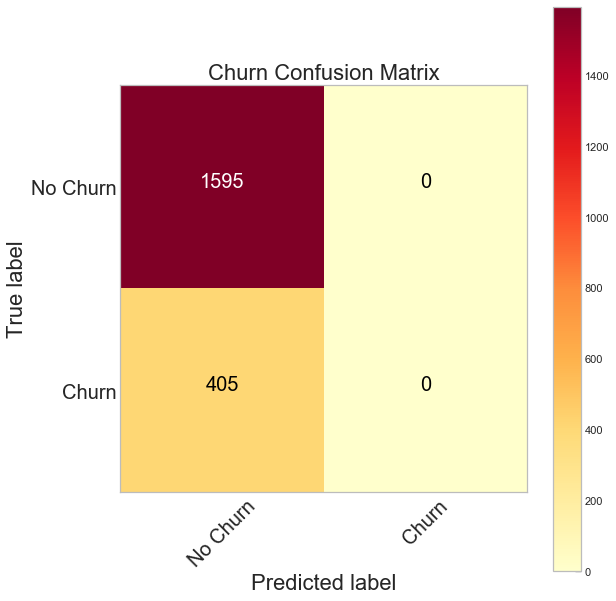

In [68]:
cm = confusion_matrix(y_test, Y_pred_cls)
plot_confusion_matrix(cm, classes=['No Churn', 'Churn'],
                      title='Churn Confusion Matrix')

In [34]:
#Precision, Recall & F1 Score for Classifier1

print(skm.classification_report(y_test,Y_pred_cls)) 

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1595
           1       0.00      0.00      0.00       405

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.44      2000
weighted avg       0.64      0.80      0.71      2000



# Prediction: Classifier1

In [35]:
#Predicting the Test set results for "Classifier1"

Y_pred_cls1 = classifier1.predict_classes(X_test, batch_size=200, verbose=0)
Y_pred1 = (Y_pred_cls1 > 0.5)
confusion_matrix(y_test, Y_pred_cls)

array([[1595,    0],
       [ 405,    0]], dtype=int64)

In [36]:
cm = skm.multilabel_confusion_matrix(y_test, Y_pred1)
print(cm)

[[[   0  405]
  [   0 1595]]

 [[1595    0]
  [ 405    0]]]


# Creating the model "Classifier2"

In [37]:
# Initialize the constructor
classifier2 = Sequential()

# Define model architecture with layers and activation function

# Adding the input layer and the first hidden layer
classifier2.add(Dense(300, input_shape = (11,), activation = 'softmax'))

# Adding the second hidden layer
classifier2.add(Dense(100, activation = 'selu'))

# Adding the output layer
classifier2.add(Dense(1, activation = 'sigmoid'))

# Compiling the model with optimizers and loss function

sgd = optimizers.Adam(lr = 0.1)
classifier2.compile(optimizer = sgd, loss = 'binary_crossentropy', metrics = ['accuracy'])

# Model Summary: Classifier2

In [38]:
classifier2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 300)               3600      
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 101       
Total params: 33,801
Trainable params: 33,801
Non-trainable params: 0
_________________________________________________________________


# Training the Model: Classifier2

In [39]:
#Fitting the model (forward pass and back propagation)

classifier2.fit(X_train, y_train, batch_size = 300, epochs = 90, verbose = 1)

Train on 8000 samples
Epoch 1/90
8000/8000 [==============================] - 1s 95us/sample - loss: 0.6478 - accuracy: 0.7732
Epoch 2/90
8000/8000 [==============================] - 0s 23us/sample - loss: 0.5109 - accuracy: 0.7960
Epoch 3/90
8000/8000 [==============================] - 0s 20us/sample - loss: 0.5025 - accuracy: 0.7960
Epoch 4/90
8000/8000 [==============================] - 0s 22us/sample - loss: 0.5020 - accuracy: 0.7960
Epoch 5/90
8000/8000 [==============================] - 0s 20us/sample - loss: 0.5012 - accuracy: 0.7960
Epoch 6/90
8000/8000 [==============================] - 0s 21us/sample - loss: 0.4992 - accuracy: 0.7960
Epoch 7/90
8000/8000 [==============================] - 0s 20us/sample - loss: 0.5000 - accuracy: 0.7960
Epoch 8/90
8000/8000 [==============================] - 0s 21us/sample - loss: 0.4983 - accuracy: 0.7960
Epoch 9/90
8000/8000 [==============================] - 0s 20us/sample - loss: 0.5006 - accuracy: 0.7960
Epoch 10/90
8000/8000 [==========

8000/8000 [==============================] - 0s 23us/sample - loss: 0.4524 - accuracy: 0.7946
Epoch 78/90
8000/8000 [==============================] - 0s 24us/sample - loss: 0.4506 - accuracy: 0.7936
Epoch 79/90
8000/8000 [==============================] - 0s 21us/sample - loss: 0.4518 - accuracy: 0.7946
Epoch 80/90
8000/8000 [==============================] - 0s 20us/sample - loss: 0.4532 - accuracy: 0.7936
Epoch 81/90
8000/8000 [==============================] - 0s 21us/sample - loss: 0.4527 - accuracy: 0.7949
Epoch 82/90
8000/8000 [==============================] - 0s 21us/sample - loss: 0.4565 - accuracy: 0.7939
Epoch 83/90
8000/8000 [==============================] - 0s 23us/sample - loss: 0.4560 - accuracy: 0.7910
Epoch 84/90
8000/8000 [==============================] - 0s 23us/sample - loss: 0.4546 - accuracy: 0.7951
Epoch 85/90
8000/8000 [==============================] - 0s 20us/sample - loss: 0.4569 - accuracy: 0.7954
Epoch 86/90
8000/8000 [==============================] - 0

# Model Evaluation: Classifier2

In [40]:
X_test = preprocessing.normalize(X_test)

results = classifier2.evaluate(X_test, y_test)

2000/2000 [==============================] - 0s 101us/sample - loss: 0.5124 - accuracy: 0.7640


In [41]:
print(classifier1.metrics_names)
print(results)    

['loss', 'accuracy']
[0.5124180073738098, 0.764]


In [42]:
#Accuracy score for Classifier2

loss, acc = classifier2.evaluate(X_test, y_test, verbose=0)
print('Accuracy: %.3f'  % acc)
print('Loss: %.3f' % loss)

Accuracy: 0.764
Loss: 0.512


# Confusion Matrix: Classifier2

In [43]:
Y_pred_cls2 = classifier2.predict_classes(X_test, batch_size=200, verbose=0)
confusion_matrix(y_test, Y_pred_cls2)

array([[1316,  279],
       [ 193,  212]], dtype=int64)

Confusion matrix, without normalization
[[1316  279]
 [ 193  212]]


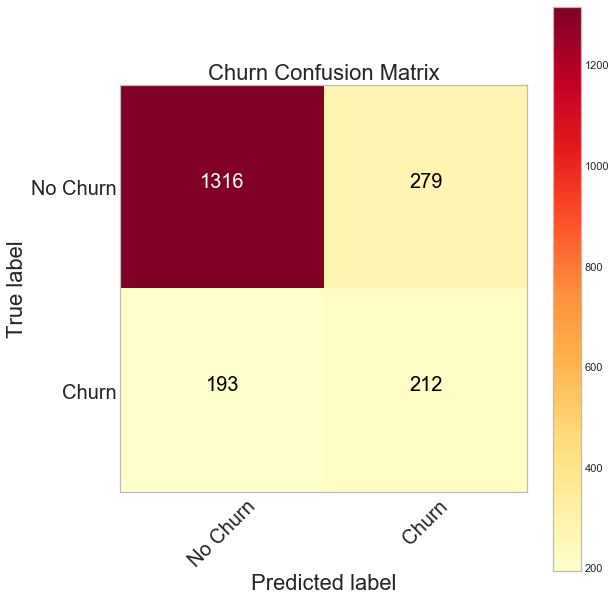

In [67]:
cm = confusion_matrix(y_test, Y_pred_cls2)
plot_confusion_matrix(cm, classes=['No Churn', 'Churn'],
                      title='Churn Confusion Matrix')

In [44]:
#Precision, Recall & F1 Score for Classifier2

print(skm.classification_report(y_test,Y_pred_cls2)) 

              precision    recall  f1-score   support

           0       0.87      0.83      0.85      1595
           1       0.43      0.52      0.47       405

    accuracy                           0.76      2000
   macro avg       0.65      0.67      0.66      2000
weighted avg       0.78      0.76      0.77      2000



# Prediction: Classifier2

In [45]:
#Predicting the Test set results for "Classifier2"

Y_pred_cls3 = classifier2.predict_classes(X_test, batch_size=200, verbose=0)
Y_pred2 = (Y_pred_cls3 > 0.5)
confusion_matrix(y_test, Y_pred_cls3)

array([[1316,  279],
       [ 193,  212]], dtype=int64)

In [46]:
cm = skm.multilabel_confusion_matrix(y_test, Y_pred2)
print(cm)

[[[ 212  193]
  [ 279 1316]]

 [[1316  279]
  [ 193  212]]]


# Creating the model "Classifier3"

In [51]:
# Initialize the constructor
classifier3 = Sequential()

# Define model architecture with layers and activation function

# Adding the input layer and the first hidden layer
classifier3.add(Dense(10000, input_shape = (11,), activation = 'softmax'))

# Adding the second hidden layer
classifier3.add(Dense(1000, activation = 'elu'))

# Adding the output layer
classifier3.add(Dense(1, activation = 'sigmoid'))

# Compiling the model with optimizers and loss function

sgd = optimizers.Nadam(lr = 0.0001)
classifier3.compile(optimizer = sgd, loss = 'binary_crossentropy', metrics = ['accuracy'])

# Model Summary: Classifier3

In [52]:
classifier3.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 10000)             120000    
_________________________________________________________________
dense_16 (Dense)             (None, 1000)              10001000  
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 1001      
Total params: 10,122,001
Trainable params: 10,122,001
Non-trainable params: 0
_________________________________________________________________


# Training the Model: Classifier3

In [53]:
#Fitting the model (forward pass and back propagation)

classifier3.fit(X_train, y_train, batch_size = 666, epochs = 33, verbose = 1)

Train on 8000 samples
Epoch 1/33
8000/8000 [==============================] - 15s 2ms/sample - loss: 0.6833 - accuracy: 0.7480
Epoch 2/33
8000/8000 [==============================] - 15s 2ms/sample - loss: 0.6583 - accuracy: 0.7960
Epoch 3/33
8000/8000 [==============================] - 14s 2ms/sample - loss: 0.6312 - accuracy: 0.7960
Epoch 4/33
8000/8000 [==============================] - 15s 2ms/sample - loss: 0.6066 - accuracy: 0.7960
Epoch 5/33
8000/8000 [==============================] - 16s 2ms/sample - loss: 0.5858 - accuracy: 0.7960
Epoch 6/33
8000/8000 [==============================] - 16s 2ms/sample - loss: 0.5689 - accuracy: 0.7960
Epoch 7/33
8000/8000 [==============================] - 15s 2ms/sample - loss: 0.5527 - accuracy: 0.7960
Epoch 8/33
8000/8000 [==============================] - 16s 2ms/sample - loss: 0.5387 - accuracy: 0.7960
Epoch 9/33
8000/8000 [==============================] - 18s 2ms/sample - loss: 0.5296 - accuracy: 0.7960
Epoch 10/33
8000/8000 [==========

# Model Evaluation: Classifier3

In [54]:
X_test = preprocessing.normalize(X_test)

results = classifier3.evaluate(X_test, y_test)

2000/2000 [==============================] - 2s 1ms/sample - loss: 0.5039 - accuracy: 0.7975


In [55]:
print(classifier3.metrics_names)
print(results)    

['loss', 'accuracy']
[0.5038664524555206, 0.7975]


In [56]:
#Accuracy score for Classifier3

loss, acc = classifier3.evaluate(X_test, y_test, verbose=0)
print('Accuracy: %.3f'  % acc)
print('Loss: %.3f' % loss)

Accuracy: 0.798
Loss: 0.504


# Confusion Matrix: Classifier3

In [57]:
Y_pred_cls4 = classifier3.predict_classes(X_test, batch_size=200, verbose=0)
confusion_matrix(y_test, Y_pred_cls4)

array([[1595,    0],
       [ 405,    0]], dtype=int64)

Confusion matrix, without normalization
[[1595    0]
 [ 405    0]]


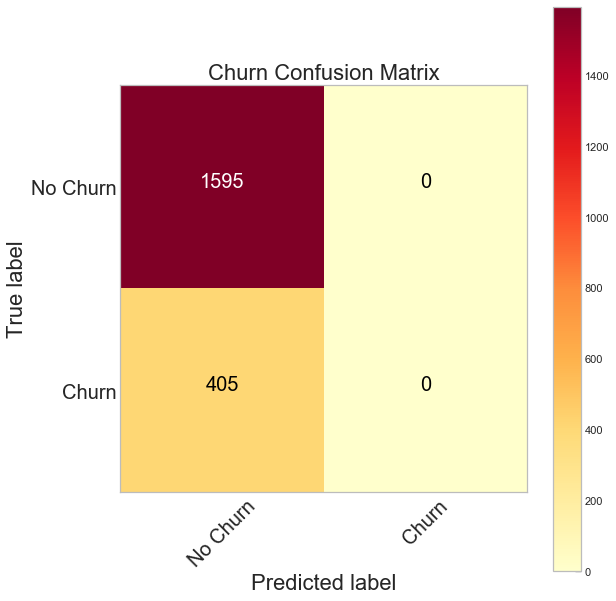

In [63]:
cm = confusion_matrix(y_test, Y_pred_cls4)
plot_confusion_matrix(cm, classes=['No Churn', 'Churn'],
                      title='Churn Confusion Matrix')

In [58]:
#Precision, Recall & F1 Score for Classifier3

print(skm.classification_report(y_test,Y_pred_cls4)) 

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1595
           1       0.00      0.00      0.00       405

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.44      2000
weighted avg       0.64      0.80      0.71      2000



# Prediction: Classifier3

In [59]:
#Predicting the Test set results for "Classifier3"

Y_pred_cls5 = classifier3.predict_classes(X_test, batch_size=200, verbose=0)
Y_pred3 = (Y_pred_cls5 > 0.5)
confusion_matrix(y_test, Y_pred_cls5)

array([[1595,    0],
       [ 405,    0]], dtype=int64)

In [60]:
cm = skm.multilabel_confusion_matrix(y_test, Y_pred3)
print(cm)

[[[   0  405]
  [   0 1595]]

 [[1595    0]
  [ 405    0]]]


# Conclusion

#1) Classifier1 model is performing better with an accuracy of 0.798 and loss of 0.497!
#2) Classifier2 model provides an accurate performance since both Classifier1 & Classifier3 fail to predict the negatives!

#A comparision table is provided below for reference:

Model	    |Accuracy	|Loss	|Precision	|Recall	  |F1 Score

Classifier1	 |0.798	    |0.497	|0.64	    |0.8	  |0.71

Classifier2	 |0.764	    |0.512	|0.78	    |0.76	  |0.77

Classifier3	 |0.798	    |0.504	|0.64	    |0.8	  |0.71
